<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Large-Margin-Classifiers" data-toc-modified-id="Large-Margin-Classifiers-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Large Margin Classifiers</a></span></li><li><span><a href="#Optimization" data-toc-modified-id="Optimization-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Optimization</a></span></li><li><span><a href="#Using-Lagrange-Multipliers" data-toc-modified-id="Using-Lagrange-Multipliers-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Using Lagrange Multipliers</a></span></li><li><span><a href="#Kernels" data-toc-modified-id="Kernels-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Kernels</a></span></li><li><span><a href="#Python" data-toc-modified-id="Python-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Python</a></span></li><li><span><a href="#Example" data-toc-modified-id="Example-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Example</a></span></li></ul></div>

$$\newcommand{\Rv}{\mathbf{R}}
\newcommand{\rv}{\mathbf{r}}
\newcommand{\Qv}{\mathbf{Q}}
\newcommand{\Av}{\mathbf{A}}
\newcommand{\Aiv}{\mathbf{Ai}}
\newcommand{\av}{\mathbf{a}}
\newcommand{\xv}{\mathbf{x}}
\newcommand{\Xv}{\mathbf{X}}
\newcommand{\Kv}{\mathbf{K}}
\newcommand{\yv}{\mathbf{y}}
\newcommand{\Yv}{\mathbf{Y}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\alphav}{\mathbf{\alpha}}
\newcommand{\Wv}{\mathbf{W}}
\newcommand{\wv}{\mathbf{w}}
\newcommand{\betav}{\mathbf{\beta}}
\newcommand{\gv}{\mathbf{g}}
\newcommand{\Hv}{\mathbf{H}}
\newcommand{\dv}{\mathbf{d}}
\newcommand{\Vv}{\mathbf{V}}
\newcommand{\vv}{\mathbf{v}}
\newcommand{\Uv}{\mathbf{U}}
\newcommand{\uv}{\mathbf{u}}
\newcommand{\tv}{\mathbf{t}}
\newcommand{\Tv}{\mathbf{T}}
\newcommand{\TDv}{\mathbf{TD}}
\newcommand{\Tiv}{\mathbf{Ti}}
\newcommand{\Sv}{\mathbf{S}}
\newcommand{\Gv}{\mathbf{G}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\Zv}{\mathbf{Z}}
\newcommand{\Norm}{\mathcal{N}}
\newcommand{\muv}{\boldsymbol{\mu}}
\newcommand{\sigmav}{\boldsymbol{\sigma}}
\newcommand{\phiv}{\boldsymbol{\phi}}
\newcommand{\Phiv}{\boldsymbol{\Phi}}
\newcommand{\Sigmav}{\boldsymbol{\Sigma}}
\newcommand{\Lambdav}{\boldsymbol{\Lambda}}
\newcommand{\half}{\frac{1}{2}}
\newcommand{\argmax}[1]{\underset{#1}{\operatorname{argmax}}}
\newcommand{\argmin}[1]{\underset{#1}{\operatorname{argmin}}}
\newcommand{\dimensionbar}[1]{\underset{#1}{\operatorname{|}}}
\newcommand{\grad}{\mathbf{\nabla}}
\newcommand{\ebx}[1]{e^{\betav_{#1}^T \xv_n}}
\newcommand{\eby}[1]{e^{y_{n,#1}}}
\newcommand{\Tiv}{\mathbf{Ti}}
\newcommand{\Fv}{\mathbf{F}}
\newcommand{\ones}[1]{\mathbf{1}_{#1}}
$$

# Support Vector Machines

## Large Margin Classifiers

Say we want to classify sample $\xv_n$ as class $t_n$, where $t_n$ is
either $-1$ or $1$.  Let's use a linear classifier defined by weights
$\wv$ plus the bias weight $b$.  But, to allow our classification
decisions to be nonlinear in the inputs $\xv_n$, we will transform the
inputs with basis functions $\phi(\xv_n)$.

For this two-class classification problem, using target value $t_n$
of either $-1$ or $1$ for a sample $\xv_n$, $\xv_n$ is classified correctly by a linear
classifier if $t_n (\wv^T  \phi(\xv_n) + b)  > 0$.

![image](https://www.cs.colostate.edu/~anderson/cs545/notebooks/figures/largemargin1.png)

Many differents lines will correctly separate these samples. To
minimize the chance of misclassifying future data, we will prefer the one for which the smallest
perpendicular distance to a training sample is maximized.

What is the perpendicular distance, $r$, from the line to a sample,  $\xv$?  

![image](https://www.cs.colostate.edu/~anderson/cs545/notebooks/figures/perpdistance.png)


$$
    \begin{align*}
      \xv &= \vv + r\frac{\wv}{||\wv||} \\
      \wv^T (\xv) + b &= \wv^T (\vv  +  r\frac{\wv}{||\wv||}) +b\\
      \wv^T \xv + b &= \wv^T \vv + b + \wv^T r\frac{\wv}{||\wv||} \\
      y(x) &= 0  + r \frac{\wv^T \wv}{||\wv||} \\
      y(x) &= r \frac{||\wv||^2}{||\wv||} \\
      r  &=  \frac{y(x)}{||\wv||} 
    \end{align*}
$$

## Optimization

For a correctly classified sample, $\xv_n$, $t_n y(\xv_n) >  0$, so the distance of the sample to the boundary is $\frac{t_n
y(\xv_n)}{||\wv||}$.

So, what we want is

$$
    \begin{align*}
      \argmax{\wv,b} \left ( \min_n \frac{t_n y(\xv_n)}{||\wv||} \right)\\
 =    \argmax{\wv,b} \left ( \frac{1}{||\wv||} \min_n\; t_n y(\xv_n) \right)
    \end{align*}
$$

This is difficult. Must simplify. Notice that

$$
      \begin{align*}
        \frac{t_n y(\xv_n)}{||\wv||} &= \frac{t_n (\wv^T \phi(\xv_n) + b)}{||\wv||}\\
        & = \frac{t_n (c \wv^T \phi(\xv_n) + c b)}{||c\wv||}
      \end{align*}
$$

for any $c$. 
Let's choose a $c$ for which $t (\wv^T \phi(\xv)+ b) = 1$ (once $c$ is absorbed into
$\wv$ and $b$) for the sample $\xv$ that is closest to the boundary. So $t_n (\wv^T \phi(\xv_n)+ b) \ge 1$ for all $n$.

Now our optimization problem is

$$
    \begin{align*}
&   \argmax{\wv,b} \left ( \frac{1}{||\wv_n||} \min_n\; t_n y(\xv_n) \right) \\
&=  \argmax{\wv,b} \left ( \frac{1}{||\wv_n||} \cdot 1 \right) \\
&=  \argmin{\wv,b} \left ( ||\wv_n||\right) \\
&=  \argmin{\wv,b} \frac{1}{2} ||\wv||^2
    \end{align*}
$$

with the constraint that $t_n(\wv^T \phi(\xv_n) + b) \ge 1$.

Can use algorithms designed for quadratic optimization subject to linear constraints to
find optimum $\wv$, but the following steps usually result in faster solutions.

## Using Lagrange Multipliers

Use Lagrange multipliers, $\av=\{\alpha_1,\ldots,\alpha_N\}$,
to include the constraints in the optimization problem. 

$$
    \begin{align*}
L(\wv,b,\av) &= \frac{1}{2} ||\wv||^2 - \sum_{n=1}^N \alpha_n (t_n (\wv^T
\phi(\xv_n) + b) - 1)\\
\text{We want } & \argmax{\av} \; \argmin{\wv,b}\; L(\wv,b,\av)
    \end{align*}
$$


How can we optimize this?

Yep, gradients!

First work on inner part ($\argmin{~}$)

$$
    \begin{align*}
\frac{\partial L} {\partial \wv}  &= \wv - \sum_{n=1}^N \alpha_n t_n \phi(\xv_n) = 0\\
\wv & = \sum_{n=1}^N \alpha_n t_n \phi(\xv_n)
    \end{align*}
$$

and

$$
    \begin{align*}
\frac{\partial L} {\partial b}  = - &\sum_{n=1}^N \alpha_n t_n  = 0\\
&  \sum_{n=1}^N \alpha_n t_n  = 0
    \end{align*}
$$


Substituting these results into $L$ (after some algebraic
simplifications) replaces $\wv$ and $b$ with expressions involving $\alpha_n$:

$$
      \begin{align*}
        L(\wv,b,\av) &= \frac{1}{2} \wv^T \wv - \sum_{n=1}^N \alpha_n (t_n (\wv^T
        \phi(\xv_n) + b) - 1)\\
        &=  \frac{1}{2} \wv^T \wv - \sum_{n=1}^N \alpha_n t_n (\wv^T
        \phi(\xv_n) + b)  + \sum_{n=1}^N \alpha_n\\
        &= \frac{1}{2} \wv^T \wv - \wv^T \sum_{n=1}^N \alpha_n t_n
        \phi(\xv_n) - b \sum_{n=1}^N \alpha_n t_n  + \sum_{n=1}^N \alpha_n\\
        &=  \frac{1}{2} \wv^T \wv - \wv^T \wv  + \sum_{n=1}^N \alpha_n
        \;\;\;\;\;\;\;\;\;\;\text{(substitution happens here)}\\
        &=   -\frac{1}{2} \wv^T \wv + \sum_{n=1}^N \alpha_n\\
        &=  \sum_{n=1}^N \alpha_n   -\frac{1}{2} \wv^T \wv  \\
        &=  \sum_{n=1}^N \alpha_n   -\frac{1}{2} \sum_{n=1}^N \sum_{m=1}^N \alpha_n
        \alpha_m t_n t_m \phi(\xv_n)^T \phi(\xv_m)
        \;\;\;\;\;\;\;\;\;\;\text{(and again, here)}
      \end{align*}
$$

such that $\alpha_n \ge 0$ and $\sum_{n=1}^N \alpha_n t_n = 0$.

Can optimize (incorrectly) by simply climbing the gradient with respect to $\av$ and
force all $\alpha_n \ge 0$.

$$
    \begin{align*}
      \frac{\partial L(\wv,b,\av)}{\partial \alpha_k} &=  1 -
      \sum_{n=1}^N \alpha_n t_n t_k \phi(\xv_n)^T
      \phi(\xv_k)
    \end{align*}
$$

Based on current $\av$ values, we can calculate $\wv = \sum_{n=1}^N
\alpha_n t_n \phi(\xv_n)$, and make predictions with  $y(\xv) = \wv^T \phi(\xv) + b$

But, what is $b$? Can show that solution $\av$ guarantees that

$$
    \begin{align*}
      \alpha_n &\ge 0\\
      t_n y(\xv_n) - 1 &\ge 0\\
      \alpha_n (t_n y(\xv_n) - 1) &= 0
    \end{align*}
$$

So, for every sample, either $\alpha_n = 0$ or $t_n y(\xv_n) = 1$.  

All samples for which $\alpha_n > 0$ are called //support vectors//.

So we can use any support vector $\xv_n$ to find $b$.

$$
    \begin{align*}
      t_n y(\xv_n) &= 1\\
      t_n (\wv^T \phi(\xv_n) + b)  &= 1\\
      b &= \frac{1}{t_n} - \wv^T \phi(\xv_n)
    \end{align*}
$$

Substituting $\wv = \sum_{n=1}^N \alpha_n t_n \phi(\xv_n)$ in, we get

$$
      b = \frac{1}{t_n} - \sum_{m=1}^N \alpha_m t_m \phi(\xv_m)^T \phi(\xv_n)
$$

Finally, we can write the discriminant function, $\delta(\xv)$ we have found, based
on $\alpha$ and $b$ values.

$$
\delta(\xv) = \wv^T \phi(\xv) + b
$$

Again, using $\wv = \sum_{n=1}^N \alpha_n t_n \phi(\xv_n)$ in, we get

$$
\delta(\xv) = \sum_{m=1}^N \alpha_m t_m \phi(\xv_m)^T \phi(\xv) + b
$$

## Kernels

We found $\av=\{\alpha_1,\ldots,\alpha_N\}$ that maximized
$L$.  Many of the $\alpha_i$'s are zero. Let $S$ be the set of
sample indices for support vectors (the samples with $\alpha_i >
0$). Rather than calculating
the weight vector $\wv$, we can leave the summation in place.  

Since

$$
    \begin{align*}
      \wv &= \sum_{s\in S} \alpha_s t_s \phi(\xv_s)
    \end{align*}
$$

and 

$$
    \begin{align*}
      y(\xv) &= \wv^T \phi(\xv) + b
    \end{align*}
$$

we can write

$$
    \begin{align*}
      y(\xv) &=  \sum_{s\in S} \alpha_s t_s \phi(\xv_s)^T \phi(\xv) + b
    \end{align*}
$$


And, for $b$, for support vector $n$,

$$
    \begin{align*}
      b &= \frac{1}{t_n} - \wv^T \phi(\xv_n)\\
      &= \frac{1}{t_n} -  \sum_{s\in S} \alpha_s t_s \phi(\xv_s)^T \phi(\xv_n)
    \end{align*}
$$


So, $\phi(\xv)$ only appears as a dot product with another $\phi(\xv)$. 

Key idea:  Never have to explicitly calculate the feature
vector $\phi(\xv)$.  Why is this a good idea?

If $\phi(\xv)$ is high dimensional, would be more efficient if
we can calculate $\phi(\xv)^T \phi(\vv)$ in some way that doesn't
require calculating $\phi(\xv)$.

Let $k(\xv,\vv) = \phi(\xv)^T \phi(\vv)$.  Can we just
calculate $k(\xv,\vv)$?

Here is an example. Let $\xv$ and $\vv$ be
two-dimensional samples.

$$
    \begin{align*}
      k(\xv,\vv) &=  (\xv^T \vv)^2\\
      &= (x_1 v_1 + x_2 v_2)^2\\
      &= x_1^2 z_1^2 + 2 x_1 v_1 x_2 v_2 + x_2^2 v_2^2\\
      &= (x_1^2,\sqrt{2}x_1 x_2, x_2^2) (v_1^2,\sqrt{2}v_1 v_2,
      v_2^2)^T\\
      &= \phi(\xv)^T \phi(\vv)
    \end{align*}
$$

showing that for basis function $\phi(\xv) = (x_1^2, \sqrt{2}x_1 x_2,
x_2^2)$, we have $\phi(\xv)^T \phi(\vv) = (\xv^T \vv)^2$.

What if $\xv$ and $\vv$ are 100-dimensional?

The matrix composed of all $k(\xv_n,\xv_m)$ is called the
kernel matrix, or the Gram matrix.   It must satisfy certain properties to be a
valid kernel matrix, meaning one that can be formed by the dot
product of feature vectors.  (symmetric, positive semidefinite)

Can combine kernel matrices to form new ones.

Another common example is the "Gaussian" kernel

$$
    \begin{align*}
      k(\xv,\vv) &= e^{-||\xv-\vv||^2 / 2\sigma^2}
    \end{align*}
$$

The feature vector that corresponds to this kernel has infinite dimensionality!

Can construct kernel matrices from samples with symbolic
attributes. If $A_1$ and $A_2$ are two subsets of a given set,
then  the following is a valid kernel function.

$$
    \begin{align*}
      k(A_1,A_2) &= 2^{|A_1 \cap A_2|}
    \end{align*}
$$


Let's put this kernel to use.  Our key equations from above were

$$
    \begin{align*}
      \frac{\partial L(\wv,b,\av)}{\partial \alpha_k} &=  1 -
      \sum_{n=1}^N \alpha_n t_n t_k \phi(\xv_n)^T
      \phi(\xv_k)\\
      b &= \frac{1}{t_n} - \sum_{m=1}^N \alpha_m t_m \phi(\xv_m)^T \phi(\xv_n)\\
      \delta(\xv) &= \sum_{m=1}^N \alpha_m t_m \phi(\xv_m)^T \phi(\xv) + b
    \end{align*}
$$

With the kernel matrix $K$, these become

$$
    \begin{align*}
      \frac{\partial L(\wv,b,\av)}{\partial \alpha_k} &=  1 -
      \sum_{n=1}^N \alpha_n t_n t_k K(\xv_n,\xv_k)\\
      b &= \frac{1}{t_n} - \sum_{m=1}^N \alpha_m t_m K(\xv_m,\xv_n)\\
      \delta(\xv) &= \sum_{m=1}^N \alpha_m t_m K(\xv_m,\xv) + b
    \end{align*}
$$

## Python

Need brains...no, I mean, matrices.

For the gradient with respect to all $\alpha$, we have

$$
    \begin{align*}
      \grad_\alpha{L(\wv,b,\av)} = 1 - t_* \cdot 
      \sum_{n=1}^N \alpha_n t_n K(\xv_n,\xv_*)
    \end{align*}
$$

In python, if *X* is our matrix of
training samples, one per row, we have

     for n in range(N):
         for k in range(N):
             K[n,k] = kernelF(X[n,:],X[k,:])

With *T* being a column vector of $1$'s and $-1$'s, designating
which of the two classes each sample belongs to, and //alpha// being a
column vector of $\alpha$ values for each sample, the gradient is
written

     1 - T * (alpha.T @ (T * K)).T

So, a step up this gradient is

     alpha = alpha + rho/N * (1 - T * (alpha.T @ (T * K)).T

The value of $b$ is

$$
      b = \frac{1}{t_n} - \sum_{m=1}^N \alpha_m t_m K(\xv_m,\xv_n)
$$

for any $n$ for which $\alpha_n>0$.  If $i$ is the lowest such value,

$$
      b = \frac{1}{t_i} - \sum_{m=1}^N \alpha_m t_m K(\xv_m,\xv_i)
$$

is calculated as

     i = np.where(alpha>0)[0][0]
     b = 1/T[i] - ((alpha * T).T @ K[:,i])

The discriminant function is now, for input vector $\xv$,

$$
      \delta(\xv) = \sum_{m=1}^N \alpha_m t_m K(\xv_m,\xv) + b
$$

is

     for m in range(N):
         Kd[m, 0] = kernelF(X[m, :], x)
     d = ((alpha * T).T @ K[:, 0]) + b

## Example

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import display, clear_output

In [34]:
 def svm(X, T, kernel_f, kernelName, rho, steps_per_display=10, steps=1000):

    # Initialize kernel values
    N = X.shape[0]
    K = np.zeros((N,N))
    for i in range(N):
        for j in range(N):
            K[i, j] = kernel_f(X[i, :], X[j, :])
 
    # Initialize alpha values to 0.5
    alpha = np.array([0.5] * N).reshape((-1, 1))
    
    # history vectors for plotting
    Lds = np.zeros(steps)
    nalphas = np.zeros(steps)

    for reps in range(steps):
        
        dLddak = 1 - T * (alpha.T @ (T * K)).T
        alpha += rho/N * dLddak

        alpha -= rho/N * (alpha.T @ T) * T
        
        # Enforce constraint that all alphas are >= 0
        alpha[alpha < 0] = 0

        # When 100th rep is reached, update graphics less often
        if reps == 200:
            steps_per_display *= 100

        TT = T @ T.T
        aa = alpha @ alpha.T
        s = np.sum(aa * TT * K)
        Ld = np.sum(alpha) - 0.5 * s
        Lds[reps] = Ld
        nalphas[reps] = np.sum(alpha > 0)

        # From here to end is all for graphic display
        if (reps + 1) % steps_per_display == 0:
            
            # Make discriminant function
            i = np.where(alpha > 0)[0][0]  #first nonzero alpha
            betazero = 1 / T[i] - (alpha * T).T @ K[:, i]
            
            def disc_f(x):
                Kdisc = np.zeros((x.shape[0] ,N))
                for j in range(x.shape[0]):
                    for i in range(N):
                        Kdisc[j, i] = kernel_f(x[j: j+1,:], X[i, :])
                return Kdisc @ (T * alpha) + betazero

            xs = np.linspace(np.min(X), np.max(X), 10)
            Xs, Ys = np.meshgrid(xs, xs)
            points = np.vstack((Xs.flat, Ys.flat)).T
            d = disc_f(points)
            d.resize(Xs.shape)
            
            fig.clf()

            plt.subplot(2, 2, 1)
            plt.contourf(Xs, Ys, d, [-np.inf, 0, np.inf], colors=["red", "blue"], alpha=0.3)
            mask = alpha > 0
            # plot support vectors in yellow
            rows = mask.flatten()
            plt.plot(X[rows, 0], X[rows, 1], 'o', color='yellow', ms=10)
            colors = ["red", "blue"]  # by class
            mask = (T < 0).ravel()
            plt.plot(X[mask, 0], X[mask, 1], '.', color=colors[0])
            mask = (T > 0).ravel()
            plt.plot(X[mask, 0], X[mask, 1], '.', color=colors[1])
            plt.xlabel("$x_1$")
            plt.ylabel("$x_2$")
            plt.title(kernelName)
            
            plt.subplot(2, 2, 2)
            plt.plot(Lds[:reps])
            plt.xlabel("Steps")
            plt.ylabel("$L_D$")

            plt.subplot(2, 2, 3)
            plt.plot(alpha,'o')
            plt.ylabel('alpha')
            plt.ylim(0,max(1.2, np.max(alpha)))

            plt.subplot(2, 2, 4)
            plt.plot(nalphas[:reps])
            plt.xlabel("Steps")
            plt.ylabel("Num support vectors")
            plt.ylim(0, N + 2)
            
            plt.tight_layout()
            
            clear_output(wait=True)
            display(fig)
    
    clear_output(wait=True)

In [35]:
## First class centers
m1 = np.array([-1, -2])
m2 = np.array([2, 3])

## Second class centers
m3 = np.array([-2, 4]) * 2
m4 = np.array([3, 0]) * 2

nTrain = 200

X1 = np.vstack(( np.random.normal(0, 1, (nTrain, 2)) + m1,
                 np.random.normal(0, 1, (nTrain, 2)) + m2))
X2 = np.vstack(( np.random.normal(0, 1, (nTrain, 2)) + m3,
                 np.random.normal(0, 1, (nTrain, 2)) + m4))
X = np.vstack((X1, X2))
T = np.array([-1] * nTrain * 2 + [1] * nTrain * 2).reshape((-1, 1))

In [36]:
### Kernels
def kernel_gaussian(xi, xj):
    return np.exp(-np.sum((xi - xj)**2) / 20.0)

def kernel_linear(xi, xj):
    return np.dot(xi, xj)

def kernel_poly(xi, xj):
    degree = 4
    return (1 + np.dot(xi, xj)) ** degree
    
funcs = [kernel_linear, kernel_poly, kernel_gaussian]
kernel_names = ['Linear Kernel', 'Degree 4 Polynomial Kernel', 'Gaussian Kernel']
rhos = [1.e-2, 1.e-7, 1.e-1]

In [37]:
[(i,k) for i, k in enumerate(kernel_names)]

[(0, 'Linear Kernel'),
 (1, 'Degree 4 Polynomial Kernel'),
 (2, 'Gaussian Kernel')]

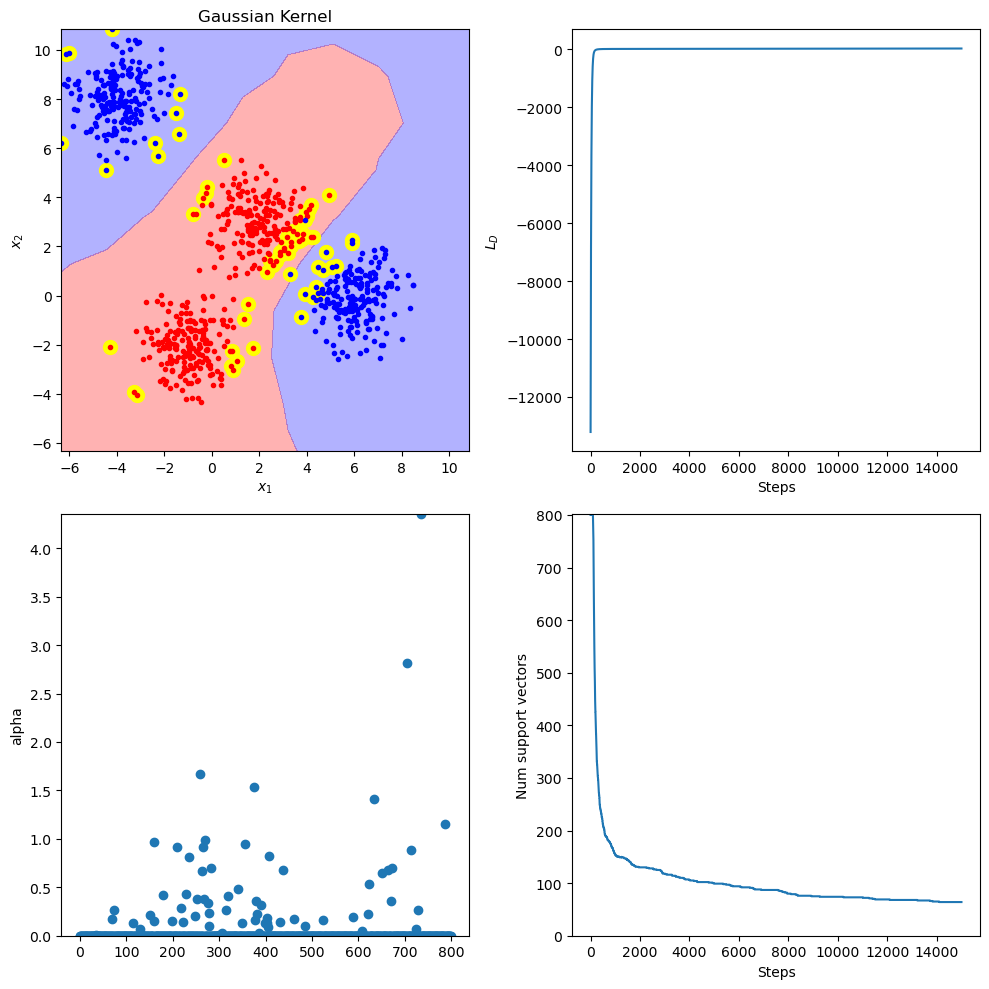

In [39]:
kerneli = 2

kernel_name = kernel_names[kerneli]
print("using kernel", kernel_name)

fig = plt.figure(figsize=(10, 10))

svm(X, T, funcs[kerneli], kernel_name, rhos[kerneli], steps_per_display=10, steps=15000)

The function being optimized, $L$, is a quadratic function in the parameters with constraints.  Optimization algorithms have been developed for this that are more efficient than gradient-based optimizers.  See the discussion  [here](http://stackoverflow.com/questions/17009774/quadratic-program-qp-solver-that-only-depends-on-numpy-scipy) that mentions the use of [cvxopt](http://cvxopt.org/) and [mystic](https://github.com/uqfoundation).  In fact, demonstrating how to apply these to the optimization of SVMs and comparing to the gradient approach described here, plus the use of SCG, would make a very nice project!

We can also try the SVM implementation in the scikit-learn package.  Here is its [documentation](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).

In [10]:
import sklearn.svm as sksvm

# model = sksvm.SVC(kernel='linear', gamma='scale')
# model = sksvm.SVC(kernel='poly', degree=4, gamma='scale')
model = sksvm.SVC(kernel='rbf', gamma='scale')

model.fit(X, T.ravel())

SVC()

In [11]:
svs = np.array(model.support_vectors_)
svs.shape

(42, 2)

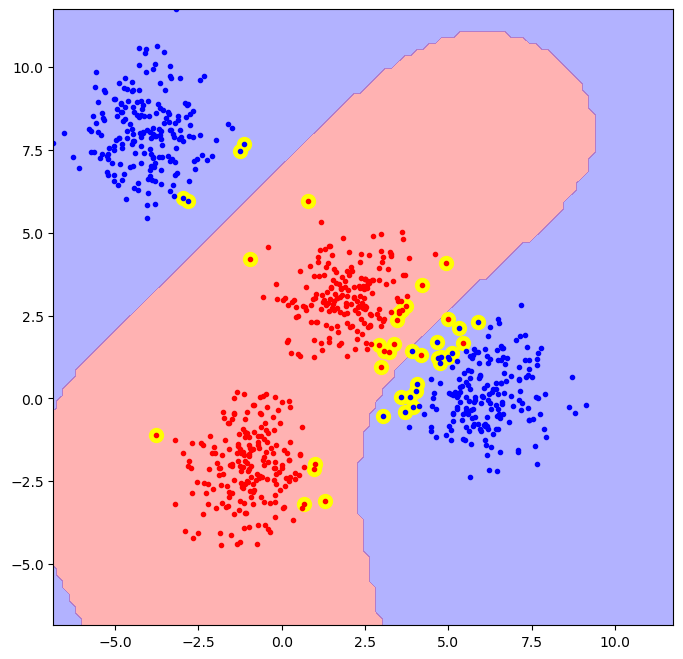

In [13]:
fig = plt.figure(figsize=(8, 8))

xs = np.linspace(np.min(X), np.max(X), 100)  # Only change is here
Xs,Ys = np.meshgrid(xs, xs)
points = np.vstack((Xs.flat, Ys.flat)).T
d = model.predict(points)
d.resize(Xs.shape)
colors = ['red', 'blue']
plt.contourf(Xs, Ys, d, [-np.inf, 0, np.inf], colors=colors, alpha=0.3)

plt.plot(svs[:, 0], svs[:, 1], 'o', color='yellow', ms=10)

mask = (T < 0).ravel()
plt.plot(X[mask, 0], X[mask, 1], '.', color=colors[0])

mask = (T > 0).ravel()
plt.plot(X[mask, 0], X[mask, 1], '.', color=colors[1])